In [2]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Download historical data for required stocks
ticker = "LUPIN.NS"
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


# Technical Analysis of Lupin

# Moving Average

<AxesSubplot:xlabel='Date'>

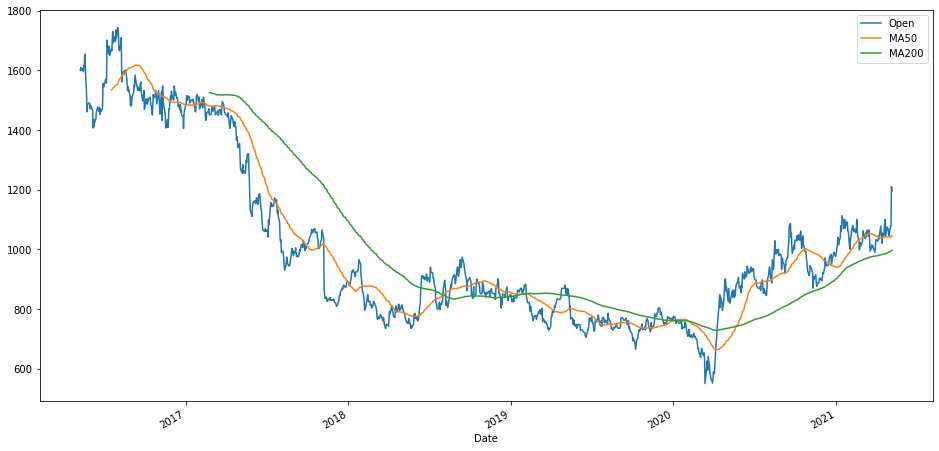

In [4]:
ohlcv['MA50'] = ohlcv['Open'].rolling(50).mean()
ohlcv['MA200'] = ohlcv['Open'].rolling(200).mean()
ohlcv[['Open','MA50','MA200']].plot(label='Lupin',figsize=(16,8))

# Technical Analysis of Lupin - MACD

In [5]:
def MACD(DF,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

In [6]:
# Visualization - plotting MACD/signal along with close price and volume for last 100 data points
df = MACD(ohlcv, 12, 26, 9)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,,,
2017-02-23,1450.000000,1465.650024,1444.849976,1450.000000,1413.229858,1225360,1479.689995,1524.993247,1422.644664,1431.458658,-8.813994,-7.964607
2017-02-27,1452.099976,1469.000000,1450.300049,1464.099976,1426.972168,867741,1479.151995,1524.258747,1423.310434,1431.126325,-7.815892,-7.934864
2017-02-28,1466.949951,1478.000000,1461.250000,1474.099976,1436.718628,1456387,1478.810994,1523.548747,1425.373233,1431.540570,-6.167337,-7.581359
2017-03-01,1479.400024,1479.400024,1466.349976,1469.800049,1432.527710,1381676,1479.050994,1522.945747,1426.473922,1431.613692,-5.139770,-7.093041
2017-03-02,1478.000000,1483.449951,1454.050049,1460.900024,1423.853516,1559024,1478.910994,1522.330747,1426.070782,1431.038864,-4.968081,-6.668049


In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(311)
plt.plot(df.iloc[-100:,4])
plt.title('LUPIN Stock Price')
plt.xticks([])

plt.subplot(312)
plt.bar(df.iloc[-100:,5].index, df.iloc[-100:,5].values)
plt.title('Volume')
plt.xticks([])

# MACD

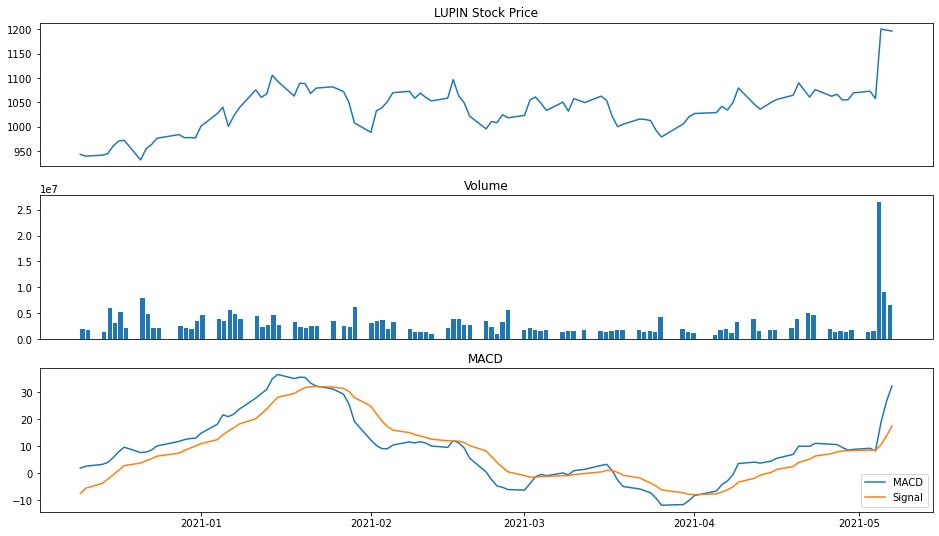

In [7]:
plt.subplot(313)
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('MACD')
plt.legend(('MACD','Signal'),loc='lower right')

plt.show()

Text(0.5, 0.98, 'Stock Price with MACD')

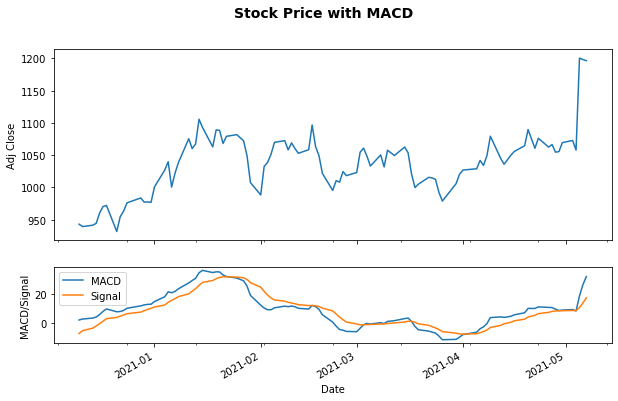

In [8]:
# Visualization - Using object orient approach
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2.5, 1]})
df.iloc[-100:,4].plot(ax=ax0)
ax0.set(ylabel='Adj Close')

df.iloc[-100:,[-2,-1]].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD/Signal')

# Title the figure
fig.suptitle('Stock Price with MACD', fontsize=14, fontweight='bold')

# ATR and Bollinger Band

In [35]:

ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [36]:
def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

In [37]:
def BollBnd(DF,n):
    "function to calculate Bollinger Band"
    df = DF.copy()
    df["MA"] = df['Adj Close'].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df['Adj Close'].rolling(n).std(ddof=0) #ddof=0 is required since we want to take the standard deviation of the population and not sample
    df["BB_dn"] = df["MA"] - 2*df['Adj Close'].rolling(n).std(ddof=0) #ddof=0 is required since we want to take the standard deviation of the population and not sample
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df

In [38]:
BollBnd(ohlcv,20).head()

,Open,High,Low,Close,Adj Close,Volume,MA,BB_up,BB_dn,BB_width
Date,,,,,,,,,,
2016-06-03,1475.349976,1482.849976,1446.000000,1450.099976,1407.096558,1691266,1491.659692,1630.854590,1352.464795,278.389794
2016-06-06,1465.000000,1465.000000,1414.349976,1419.349976,1377.258667,1899200,1482.633069,1626.827885,1338.438253,288.389632
2016-06-07,1406.000000,1443.949951,1395.000000,1434.849976,1392.298828,2157157,1473.907251,1617.790240,1330.024262,287.765979
2016-06-08,1436.250000,1442.000000,1419.650024,1430.800049,1388.368896,1084830,1466.011072,1610.469903,1321.552241,288.917662
2016-06-09,1411.099976,1440.000000,1397.400024,1427.199951,1384.875732,2025083,1456.829187,1597.350957,1316.307417,281.043540


<AxesSubplot:xlabel='Date'>

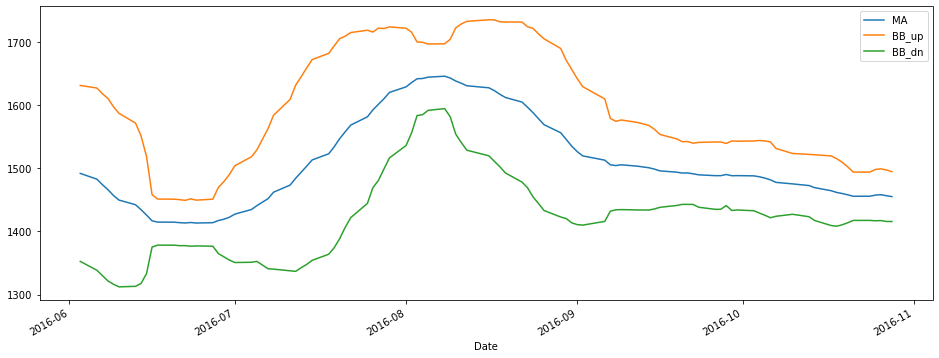

In [39]:
# Visualizing Bollinger Band of the stocks for last 100 data points

df = BollBnd(ohlcv,20)

df[['MA','BB_up','BB_dn']][:100].plot(figsize=(16,6))

# ATR and Bollinger Band

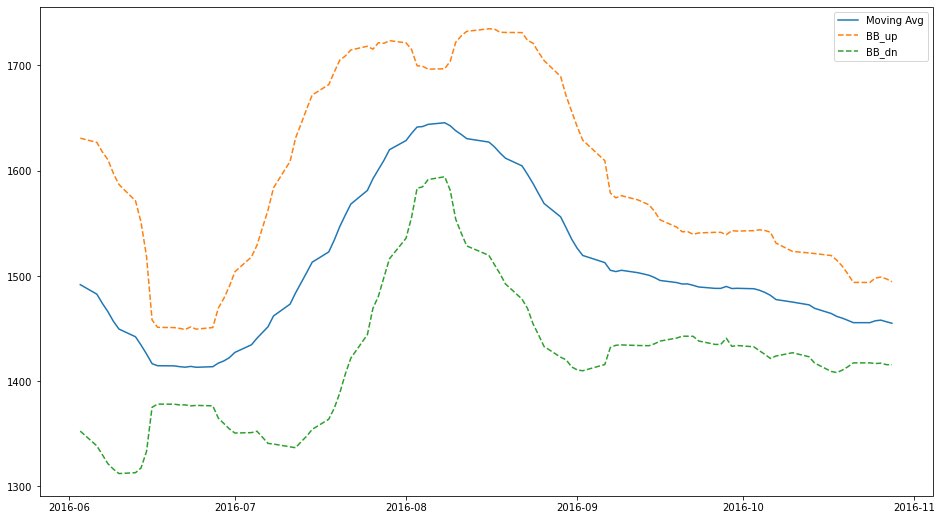

In [41]:
plt.figure(figsize=(16,9))
plt.plot(df['MA'][:100], label = 'Moving Avg')
plt.plot(df['BB_up'][:100], label='BB_up', linestyle = 'dashed')
plt.plot(df['BB_dn'][:100], label = 'BB_dn', linestyle = 'dashed')
plt.legend()
plt.show()

# Relative Strength Index - RSI

In [42]:
import numpy as np
import datetime as dt

# Download historical data for required stocks
ticker = "LUPIN.NS"
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Datetime'>

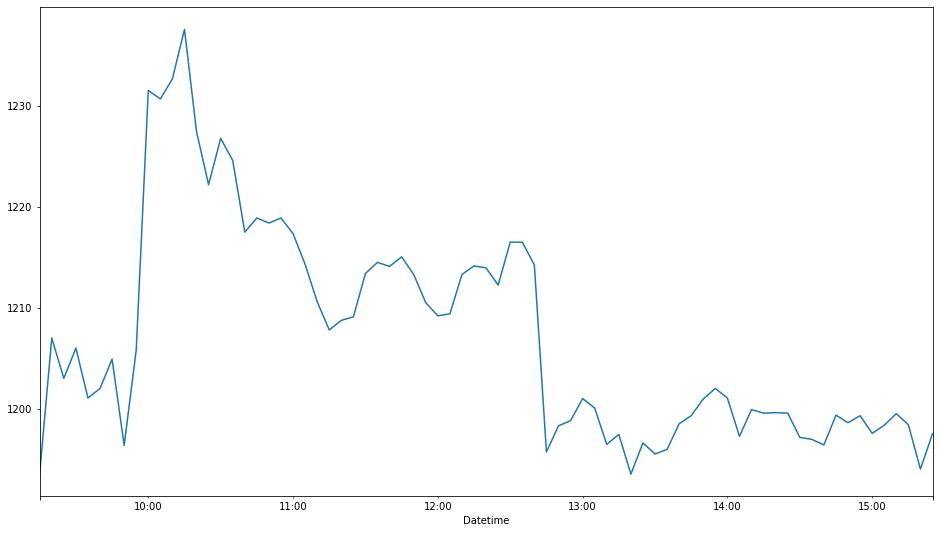

In [43]:
#1-day Chart of LUPIN
ohlcv_today = yf.download(ticker,period='1d',interval='5m')
ohlcv_today['Open'].plot(figsize=(16,9))

In [44]:
def RSI(DF,n):
    "function to calculate RSI"
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    return df['RSI']

In [45]:
# Calculating RSI without using loop
def rsi(df, n):
    "function to calculate RSI"
    delta = df["Adj Close"].diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[n-1]] = np.mean( u[:n]) # first value is average of gains
    u = u.drop(u.index[:(n-1)])
    d[d.index[n-1]] = np.mean( d[:n]) # first value is average of losses
    d = d.drop(d.index[:(n-1)])
    rs = u.ewm(com=n,min_periods=n).mean()/d.ewm(com=n,min_periods=n).mean()
    return 100 - 100 / (1+rs)

In [46]:
ohlcv_30 = yf.download(ticker,period='1y')

[*********************100%***********************]  1 of 1 completed


# Relative Strength Index - RSI(14)

<AxesSubplot:xlabel='Date'>

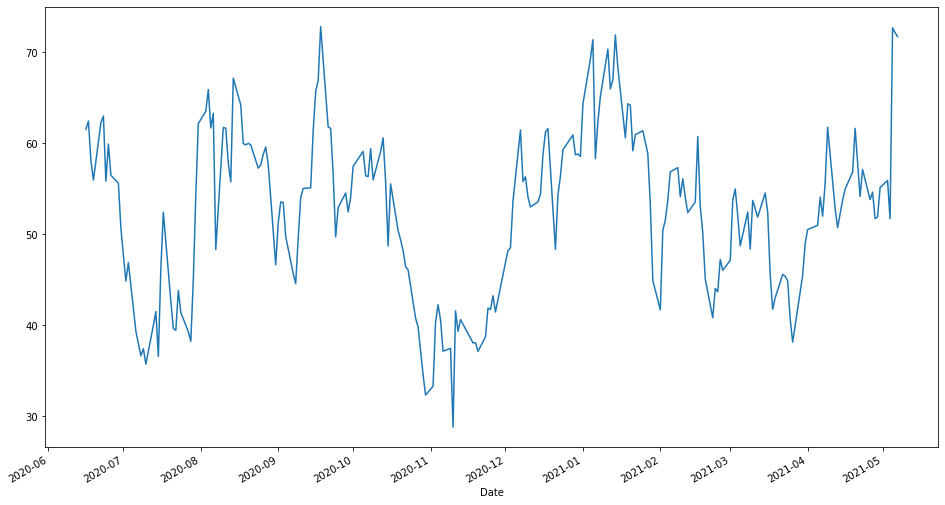

In [47]:
rsi(ohlcv_30,14).plot(figsize=(16,9))

# ADX(Average Directional Index)

In [ ]:
import yfinance as yf
import numpy as np
import datetime as dt

# Download historical data for required stocks
ticker = "LUPIN.NS"
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

In [48]:
def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2


def ADX(DF,n):
    "function to calculate ADX"
    df2 = DF.copy()
    df2['TR'] = ATR(df2,n)['TR'] #the period parameter of ATR function does not matter because period does not influence TR calculation
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus'])
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus'])
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    return df2['ADX']

# ADX(Average Directional Index)

In [51]:
df=ADX(ohlcv,14)
df.tail()

Date
2021-05-03    14.823455
2021-05-04    14.378561
2021-05-05    17.214629
2021-05-06    19.979357
2021-05-07    22.812125
Name: ADX, dtype: float64

<AxesSubplot:xlabel='Date'>

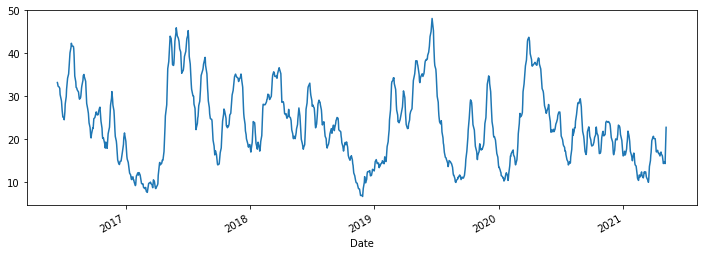

In [53]:
df.plot(figsize=(12,4))

# OBV(On Balance Volume Implementation)

In [11]:
import yfinance as yf
import numpy as np
import datetime as dt

# Download historical data for required stocks
ticker = "LUPIN.NS"
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

def OBV(DF):
    """function to calculate On Balance Volume"""
    df = DF
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret']>=0,1,-1)
    df['direction'][0] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    #return df['obv']
    return df

[*********************100%***********************]  1 of 1 completed


In [12]:
d = OBV(ohlcv)

<ipython-input-11-ee5076724b06>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'][0] = 0


<AxesSubplot:xlabel='Date'>

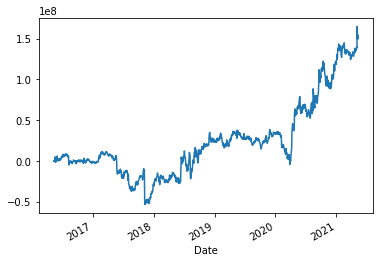

In [17]:
d['obv'].plot()

In [18]:
!pip install stocktrends

  Created wheel for stocktrends: filename=stocktrends-0.1.4-py3-none-any.whl size=5229 sha256=b621ebed8ec1903bd2b073187123f50e4943f6e8845b98c8e80aab85ec924487
  Stored in directory: c:\users\windows 10\appdata\local\pip\cache\wheels\22\3a\96\14167f69c9a0ffa5e05071e5683a8ab1a204091cef643eb9ea
Successfully built stocktrends


# Renko Charts

In [19]:
import yfinance as yf
import datetime as dt
from stocktrends import Renko

################################PLEASE READ ME####################################
#Stocktrends' author has renamed get_bricks() function to get_ohlc_data()
#therefore you may get error when trying to run line 43 below
#if that is the case please comment out line 43 and remove # sign from line 44 and rerun
##################################################################################

# Download historical data for required stocks
ticker = "LUPIN.NS"
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [20]:
def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

In [21]:
def renko_DF(DF):
    "function to convert ohlc data into renko bricks"
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.loc[:,["Date","Open","High","Low","Adj Close","Volume"]]
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
    renko_df = df2.get_ohlc_data() #if using older version of the library please use get_bricks() instead
    return renko_df


renko_data = renko_DF(ohlcv)

C:\Users\Windows 10\anaconda3\lib\site-packages\stocktrends\indicators.py:58: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  self.cdf.loc[0, 1:] = [close - brick_size, close, close - brick_size, close]


In [22]:
renko_data.tail()

,date,open,high,low,close,uptrend
135,2021-04-20,1056.0,1089.0,1056.0,1089.0,True
136,2021-05-05,1089.0,1122.0,1089.0,1122.0,True
137,2021-05-05,1122.0,1155.0,1122.0,1155.0,True
138,2021-05-05,1155.0,1188.0,1155.0,1188.0,True
139,2021-05-10,1188.0,1221.0,1188.0,1221.0,True
